<a href="https://colab.research.google.com/github/dote7ant/Univariate_Bivariate_Multivariate_analysis_in_R/blob/master/R_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify individuals that are likely to click on an ad.

## Introduction

This notebook is used to analyze data collected by a Kenyan entrepreneur on and ad she had previously ran on her blog.

### a. Defining the question.

Identify which individuals are most likely to click on her ads. 

### b. Defining the metrics of success.

For this project to be successful we should aim to do the following:

1. Clean the data.
2. Find how other variables interact and influence whether a visitor on the site clicks our clients ad.
3. Determine which variables are most important to the research question.
4. Make recommedations on which visitors to the site will click on the ad.

### c. Understanding the context.

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her in answering the research question.

### d. Recording the experimental design.

The following are the steps that we will take to conduct this project. They are listed below:


1. Loading the required libraries.
2. Loading the data set.
3. Check the data.
4. Data preparation.
5. Validate the data.
6. Performing Exploratory Data Analysis (EDA). 
7. Draw conclusions.
8. Make recommendations.



## 1. Reading the data and importing required libraries

In [2]:
# install data explorer
# we will use this to add visuals to our checking of data
install.packages('DataExplorer') 
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘data.table’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [3]:
# we use tidyverse for the ggplot2 that we will use in plotting scatter plots
install.packages("tidyverse")
require(tidyverse)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# install ggplot
# this is used for plots
install.packages("ggplot2")
require(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”


In [5]:
# install data table
install.packages("data.table")
require(data.table)

# load the data set 
url = "http://bit.ly/IPAdvertisingData"
df <- fread(url)

# preview the data set 
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


## 2. Check the data 

In [6]:
# find the first 5 rows
head(df, 5)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
# check the last 5 rows
tail(df, 5)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


We observe that from the head and tail of the dataset that we can see the time spent on the site, topic within the blog, city, gender, country, date, age and the area income for a particular area. And we see whether an ad was clicked or not.

In [8]:
# find the column names
print(names(df))

 [1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"           


We will want to remove the spaces between the column names shown above and have them be lower case

In [9]:
# check type of data set
class(df)

[1] "data.table" "data.frame"

In [10]:
# find the column data types 
str(df)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Most of the columns are numeric with 4 of them being non numeric.

In [11]:
# find out how many rows and columns are present in the data set
dim(df)

[1] 1000   10

There are 1000 rows and 10 columns

In [12]:
# check if there are any duplicates
anyDuplicated(df)

[1] 0

There are no duplicate values

In [13]:
# check if there are any missing values
colSums(is.na(df))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

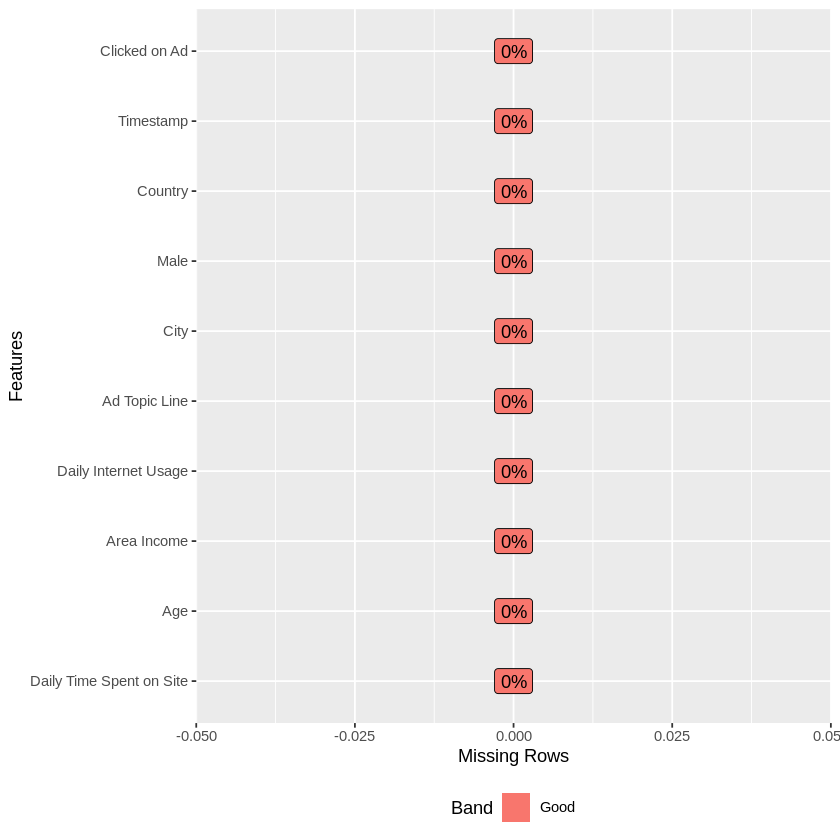

In [14]:
# a visualization to show percentage of missing values in our data set
plot_missing(df)

No missing values

In [15]:
# frequency of gender
gen <- table(df$Male)
gen


  0   1 
519 481 

There are slightly more females than males in the dataset.

In [16]:
# frequency of clicks
click <- table(df$'Clicked on Ad')
click


  0   1 
500 500 

Those who clicked on the ad and those who did not click on the ad are equal.

## 3. Tidying up the data

In [17]:
# change column names to lower case 
colnames(df) <- tolower(colnames(df))
colnames(df)

[1] "daily time spent on site" "age"                     
 [3] "area income"              "daily internet usage"    
 [5] "ad topic line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked on ad"

In [43]:
# replace the white space with an underscore
colnames(df)  <- sub(" ", "_", colnames(df) )

In [44]:
# confirm the names have been converted 
print(names(df))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"           


Success!!!

We will now check for outliers and determine whether we will remove them depending on the column that will posses outliers. This will be for the numerical columns only.

In [48]:
# get package to use for data manipulation
install.packages("dplyr")                            # Install dplyr
library("dplyr")               

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [85]:
# rename the male column to gender
df <- rename(df, gender = male)

In [87]:
# retrieve numerical columns 
data <- select_if(df, is.numeric)             # Subset numeric columns with dplyr
head(data)

daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,clicked_on_ad
<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0


In [50]:
# print out the outlier
boxplot.stats(df$`daily_time spent on site`)$out

NULL

In [51]:
# print out the outlier
boxplot.stats(df$`daily_internet usage`)$out

NULL

In [52]:
# print out the outlier
boxplot.stats(df$age)$out

integer(0)

In [53]:
# print out the outlier
boxplot.stats(df$area_income)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

We observe outliers in the area income column, but we will not remove them since they make sense in that some areas have people with higher incomes than others.

## 4. Exploratory Data analysis

### a. Univariate analysis

In [88]:
# get the summary statistics
summary(data)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
     gender      clicked_on_ad
 Min.   :0.000   Min.   :0.0  
 1st Qu.:0.000   1st Qu.:0.0  
 Median :0.000   Median :0.5  
 Mean   :0.481   Mean   :0.5  
 3rd Qu.:1.000   3rd Qu.:1.0  
 Max.   :1.000   Max.   :1.0  

Above we can observe the mean, median, first and third quantiles, minimum number and maximum number. The table below shows the data in a more organized format.

In [89]:
### Mode is the observation that appears most frequently.
# function to get the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [90]:
# call the function to get the mode for the columns
ad_mode <- getmode(df)
print(ad_mode)

   daily_time_spent_on_site age area_income daily_internet_usage
1:                    68.95  35     61833.9               256.09
                        ad_topic_line        city gender country
1: Cloned 5thgeneration orchestration Wrightburgh      0 Tunisia
             timestamp clicked_on_ad
1: 2016-03-27 00:53:11             0


The most common advert topic from the mode is the ***cloned 5th generation orchestration***.

The most common City is **Wrightburgh** and most common country is **Tunisia.**

The table below shows the statistical summaries that is the mean, mode, median, min and max value and the first and third quantiles.

Mean is the average of a set of numbers. 

Median is the middle value in an order set of numbers.

Mode is the most frequent observation in a set of data.

|Column|Mean|Median|Mode|Min_value|Max_value|1st_quantile|3rd_quantile|
|------|------|------|------|------|------|------|------|
|Daily time spent on site|65.00|68.22|68.95|32.60|91.43|51.36|78.55|
|Age|36|35|35|19|61|29|42|
|Area Income|55,000|57,012|61,833.9|13,996|79,485|47,032|65,471|
|Daily Internet Usage|180|183.1|256.09|104.8|270|138.8|218.8|
|Gender|0.481|0|0|0|1|0|1|
|Clicked on Ad|0.5|0.5|0 and 1|0|1|0|1|

#### Variance 

This is the measure of how far a set of numbers are spread out from their average value.

In [91]:
# find the variance for age
va_data <- var(data$age)
print(va_data)

[1] 77.18611


In [92]:
# find the variance for the area income
va_data <- var(data$area_income)
print(va_data)

[1] 179952406


In [93]:
# find the variance for clicked on ad
va_data <- var(data$clicked_on_ad)
print(va_data)

[1] 0.2502503


In [94]:
# find the variance for daily internet usage
va_data <- var(data$daily_internet_usage)
print(va_data)

[1] 1927.415


In [95]:
# find the variance for daily time spent on site
va_data <- var(data$daily_time_spent_on_site)
print(va_data)

[1] 251.3371


In [97]:
# find the variance for gender
va_data <- var(data$gender)
print(va_data)

[1] 0.2498889


We observe that area income has the highest variance, this might be due to the fact that there were outliers which we did not remove. Daily internet usage and time spent on site follow with a variance of 1972 and 251 respectively. Age has a lower variance of 77. Clicked on ad and the gender(male) columns have low variances. It is also observed that the variances were all positive.

#### Standard Deviation 

This is the square root of the variance.


In [98]:
# find the standard deviation for age
std_data_age <- sd(data$age)
print(std_data_age)

[1] 8.785562


In [99]:
# find the standard deviation for the area income
std_data_income <- sd(data$area_income)
print(std_data_income)

[1] 13414.63


In [100]:
# find the standard deviation for clicked on ad
std_data_click <- sd(data$clicked_on_ad)
print(std_data_click)

[1] 0.5002502


In [101]:
# find the standard deviation for daily internet usage
std_data_usage <- sd(data$daily_internet_usage)
print(std_data_usage)

[1] 43.90234


In [102]:
# find the standard deviation for daily time spent on site
std_data_time <- sd(data$daily_time_spent_on_site)
print(std_data_time)

[1] 15.85361


In [103]:
# find the standard deviation for gender
std_data_gender <- sd(data$gender)
print(std_data_gender)

[1] 0.4998889


Since standard deviation is the square root of variance we observe the same ranking as that of variance. 

### Univariate graphs

#### Box plots

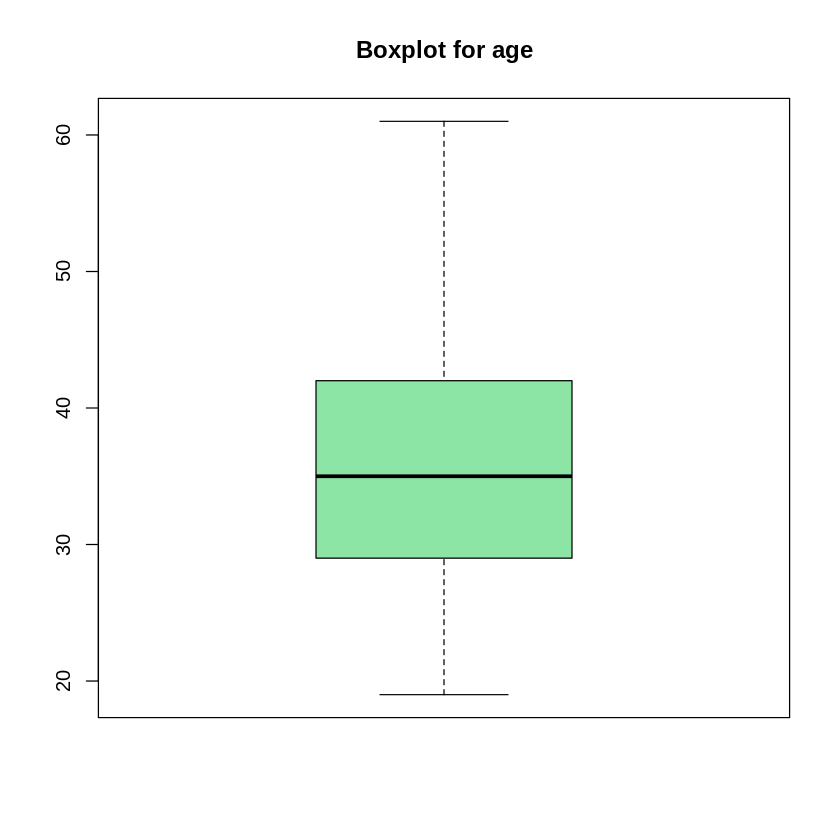

In [62]:
# plot a boxplot for age
age <- data$age
boxplot(age, col=rgb(0.1,0.8,0.3,0.5), main = "Boxplot for age")

No outliers found in the age column.

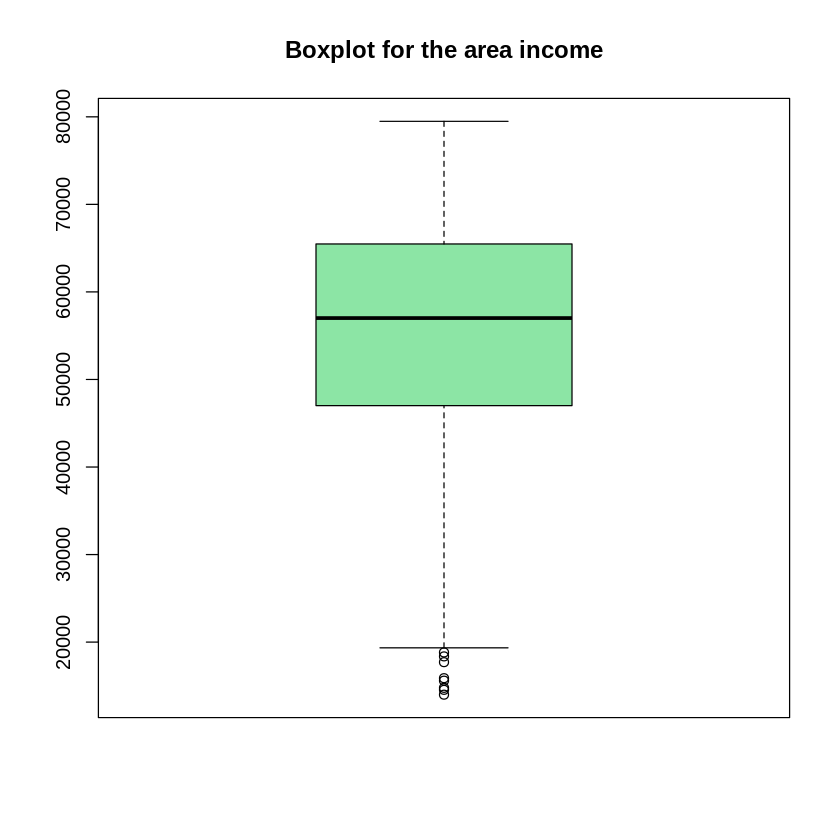

In [63]:
# plot a boxplot for income
income <-  data$area_income
boxplot(income, col=rgb(0.1,0.8,0.3,0.5), main = "Boxplot for the area income")

As discovered earlier in the outlier section using boxplots we discover that the area income has outliers. However this are not a concern for us as certain places have different levels of income.

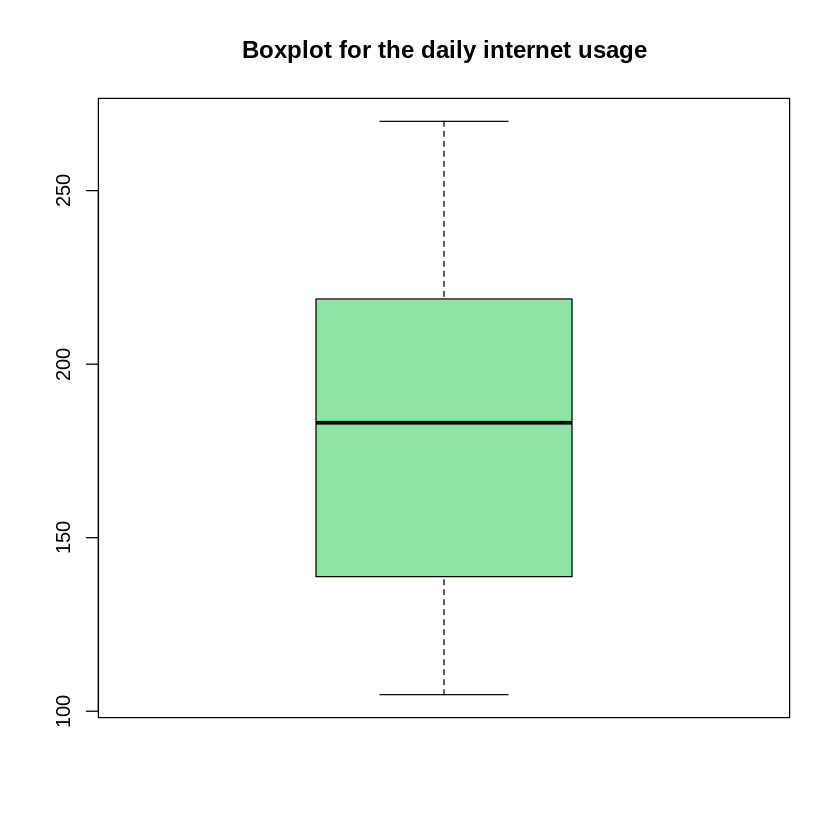

In [64]:
# plot a boxplot for daily internet usage
use <-data$daily_internet_usage
boxplot(use, col=rgb(0.1,0.8,0.3,0.5), main = "Boxplot for the daily internet usage")

No outliers found in the daily internet usage column.

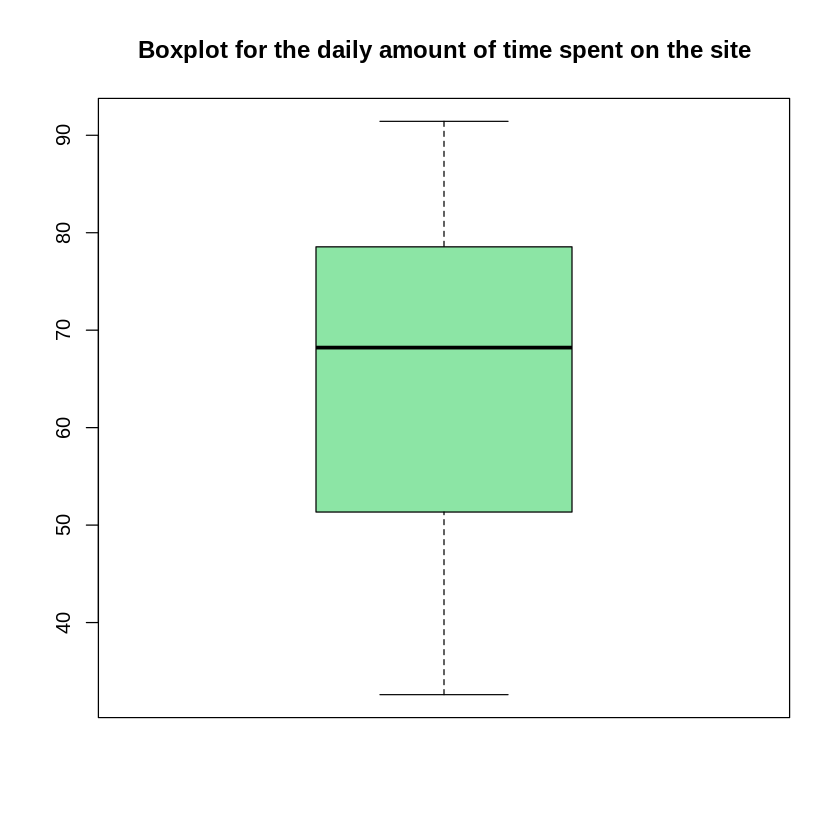

In [65]:
# plot a boxplot for time spent on site
time <- data$daily_time_spent_on_site
boxplot(time, col=rgb(0.1,0.8,0.3,0.5), main = "Boxplot for the daily amount of time spent on the site")

No outliers found in the daily amount of time spent on site column.

#### Histograms

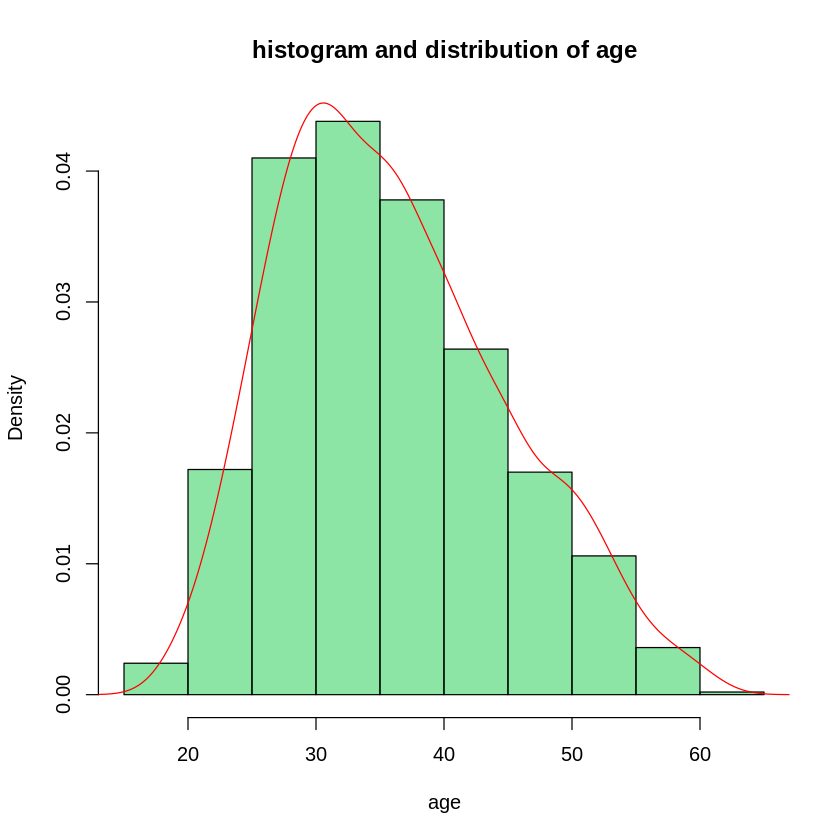

In [41]:
# plot a boxplot for age
age <- data$age
hist(age, main = "histogram and distribution of age", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(data$age), col = "red")

The distribution is relatively normal. The majority of visitors to the site are age between 25 and 40.

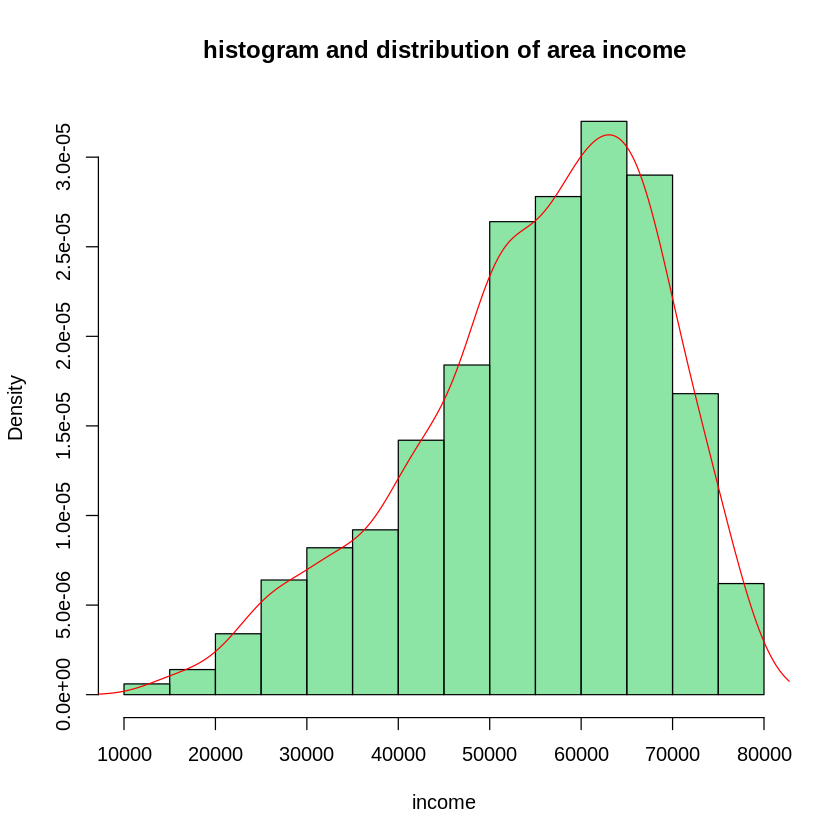

In [42]:
# plot a boxplot for income
income <-  data$area_income
hist(income, main = "histogram and distribution of area income", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(income), col = "red")

The distribution is relatively normal. Majority of the visitors to the site come from areas of income in the range 50,000 to 70,000

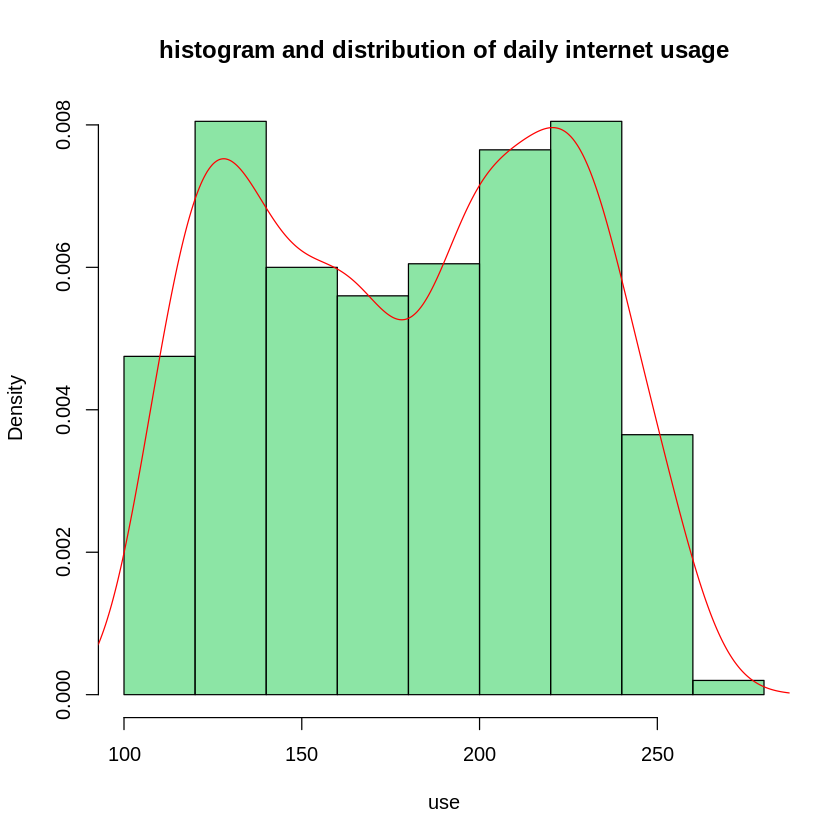

In [43]:
# plot a boxplot for daily internet usage
use <-data$daily_internet_usage
hist(use, main = "histogram and distribution of daily internet usage", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(use), col = "red")

There are many people who have a high time count for daily internet usage as well as those who have a low time count for daily internet usage. This describes the shape of the distribution.

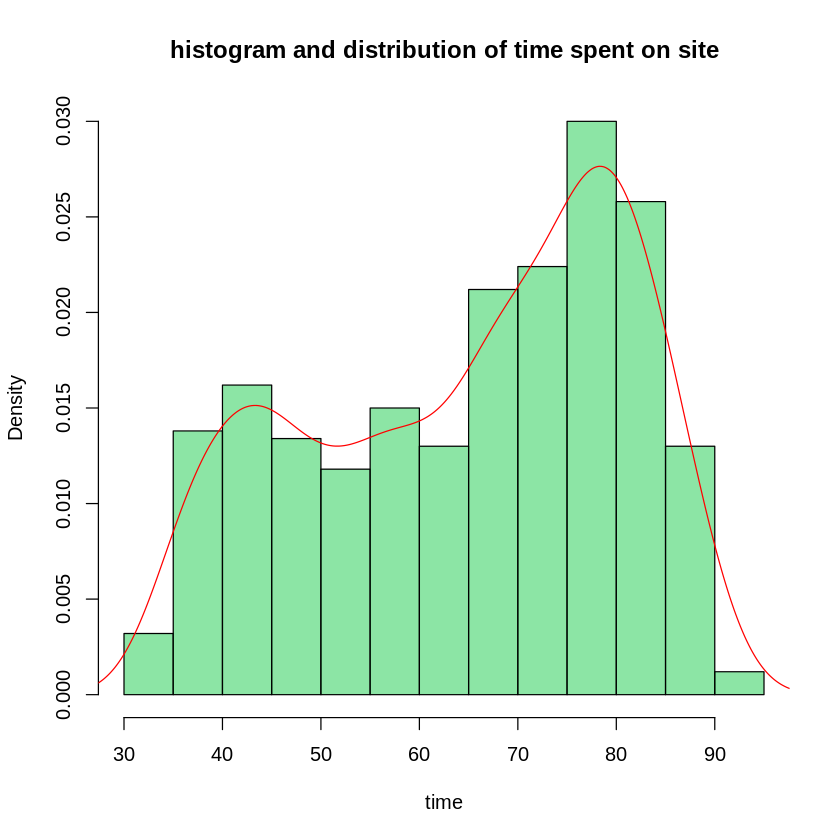

In [44]:
# plot a boxplot for time spent on site
time <- data$daily_time_spent_on_site
hist(time, main = "histogram and distribution of time spent on site", col=rgb(0.1,0.8,0.3,0.5), prob = TRUE,  )
lines(density(time), col = "red")

We observe the same trend as the daily internet usage distribution of an M kinda shape. The difference is that majority of the people spent alot of time on the site.

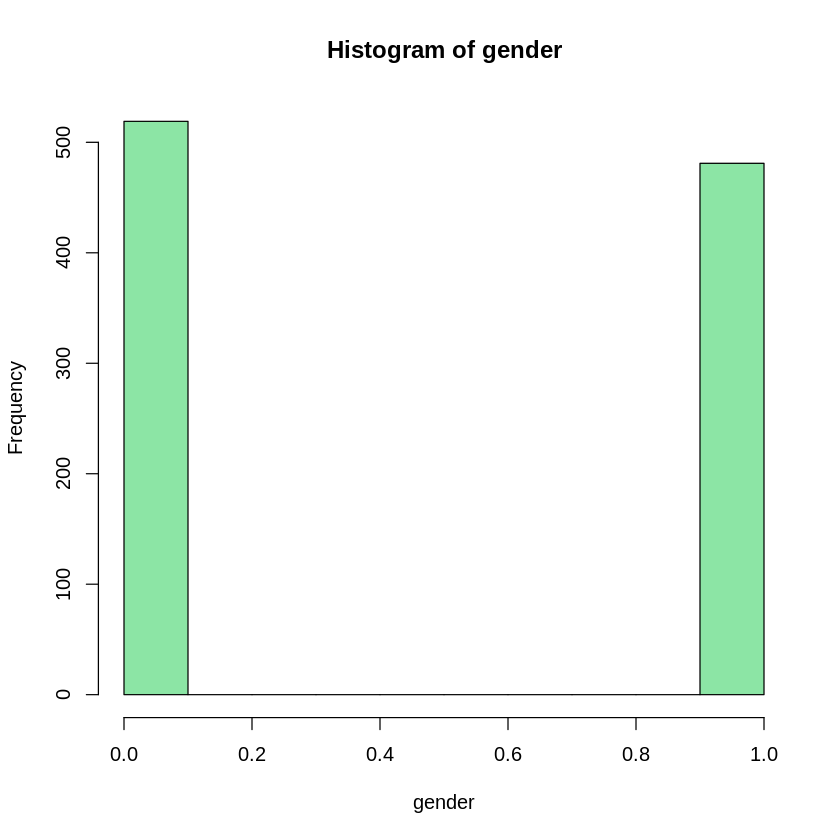

In [104]:
# plot a boxplot for gender
gender <- data$gender
hist(gender, col=rgb(0.1,0.8,0.3,0.5) )

This shows that there are more females than there are males, thus the two bars.

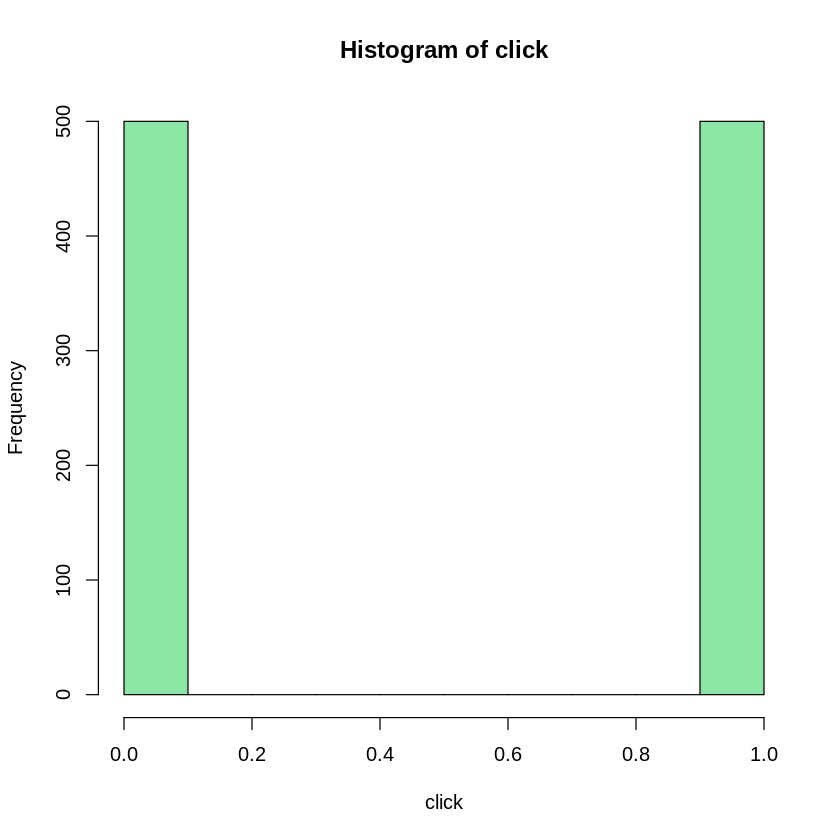

In [46]:
# plot a boxplot for age
click <- data$clicked_on_ad
hist(click, col=rgb(0.1,0.8,0.3,0.5) )

This shows that there is an equal number of individuals that clicked on the ad.

#### Bar plots

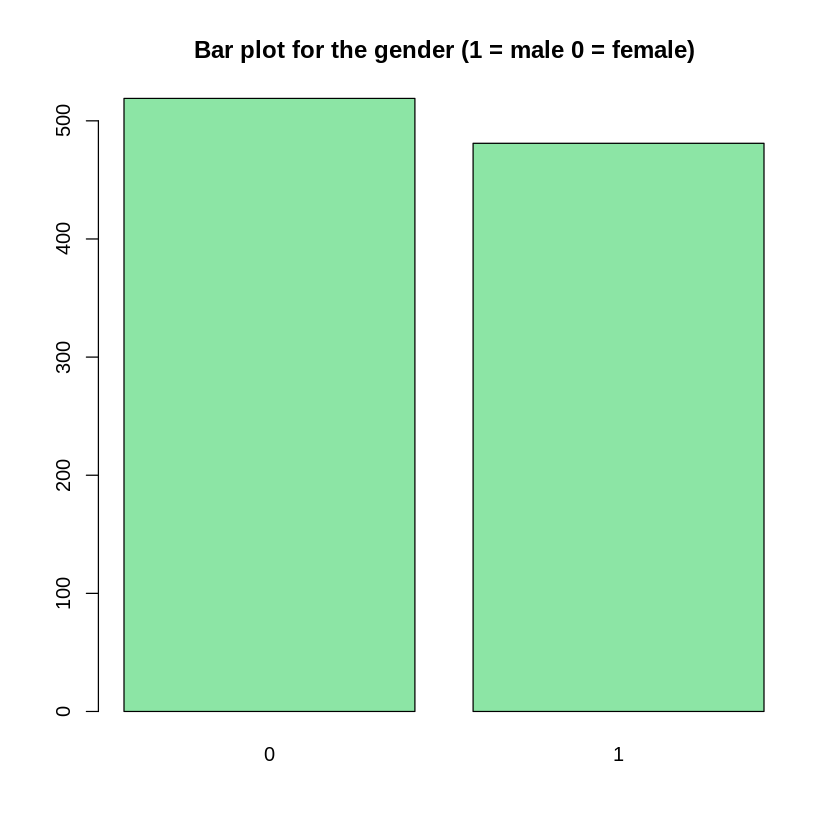

In [105]:
# bar plot for the types of gender
gender <- data$gender
gen_f <- table(gender)
barplot(gen_f, col=rgb(0.1,0.8,0.3,0.5), main = "Bar plot for the gender (1 = male 0 = female)")

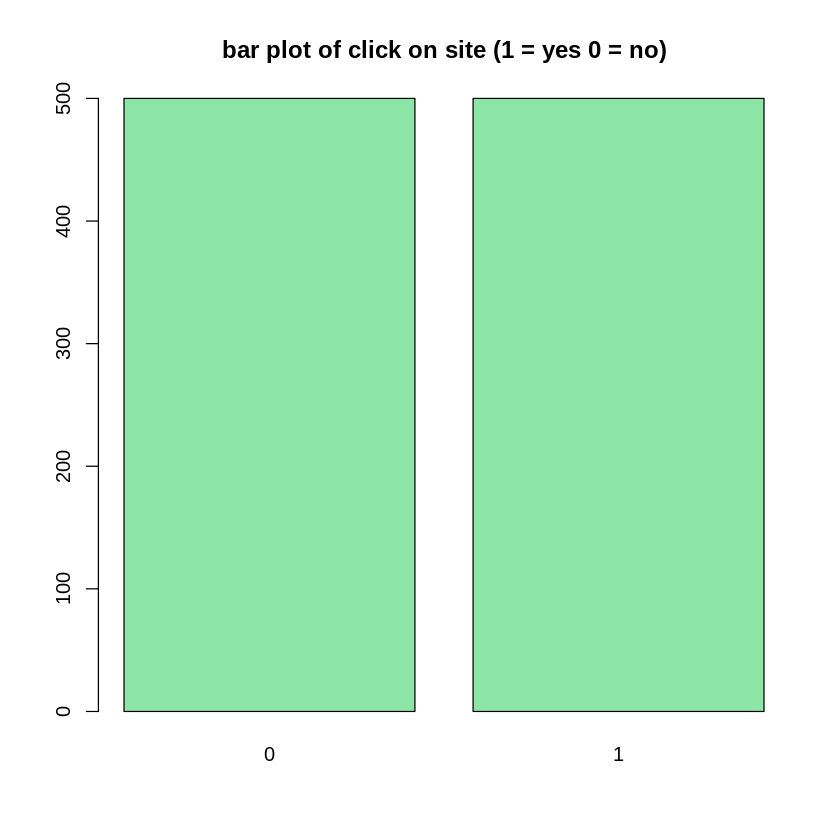

In [84]:
# bar plot for whether and individual clicked on the site or not
clicks <- data$clicked_on_ad
clicks_f <- table(clicks)
barplot(clicks_f, col=rgb(0.1,0.8,0.3,0.5), main = "bar plot of click on site (1 = yes 0 = no)")

### b. Bivariate and Multivariate analysis

#### Correlation

Statistical technique that can show whether and how strongly pairs of variables are related. 

In [108]:
# install corrplot to plot a correlation visualization
install.packages("corrplot")
require(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: corrplot

corrplot 0.84 loaded



In [109]:
# reate correlation matrix of data
res <- cor(data) 
round(res, 2)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,clicked_on_ad
daily_time_spent_on_site,1.00,-0.33,0.31,0.52,-0.02,-0.75
age,-0.33,1.00,-0.18,-0.37,-0.02,0.49
area_income,0.31,-0.18,1.00,0.34,0.00,-0.48
daily_internet_usage,0.52,-0.37,0.34,1.00,0.03,-0.79
gender,-0.02,-0.02,0.00,0.03,1.00,-0.04
clicked_on_ad,-0.75,0.49,-0.48,-0.79,-0.04,1.00


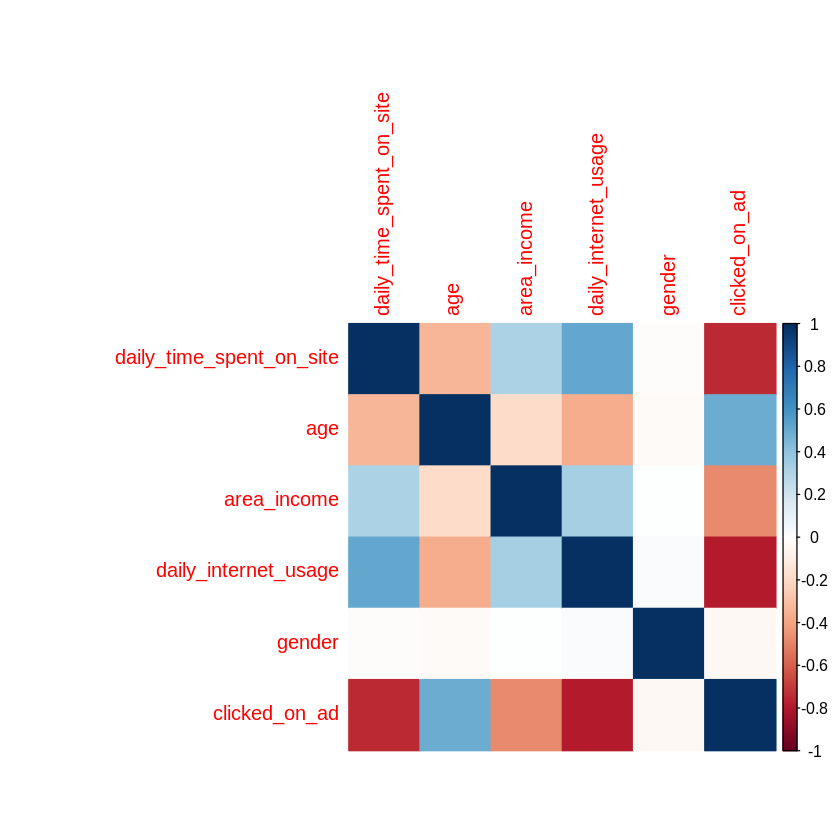

In [110]:
# correlation matrix visualization
corrplot(cor(data), method = "color")

Age and clicked on and have a higher positive correlation. 

Daily internet usage and daily time spent on site have a higer positive correlation.

Daily internet usage and area income have a higher positive correlation.

What does this tell us? It tells us that the is a greater predictive relationship between columns with high positive correlation.

#### Covariance 

This is are deviations of two variates from their respective means.

In [111]:
# data list to use for the covariance
age <- data$age
time <- data$daily_time_spent_on_site
income <- data$area_income
gender <- data$gender
use <- data$daily_internet_usage
click <- data$clicked_on_ad

##### i.) Below has the covariance between age and all other numerical columns

In [112]:
# find the covariance between age and time spent on site
cov(age,time)

[1] -46.17415

In [113]:
# find the covariance between age and area income 
cov(age, income)

[1] -21520.93

In [114]:
# find the covariance between age and gender
cov(age, gender)

[1] -0.09242142

In [115]:
# find the covariance between age and daily internet usage
cov(age, use)

[1] -141.6348

In [116]:
# find the covariance between age and clicked on ad
cov(age, click)

[1] 2.164665

##### ii.) Below has the covariance between time, income, gender, use and click

In [117]:
# find the covariance between time spent on site and area income
cov(time, income)

[1] 66130.81

In [118]:
# find the covariance between time spent on site and gender
cov(time, gender)

[1] -0.1501864

In [119]:
# find the covariance between time spent on site and daily internet usage
cov(time, use)

[1] 360.9919

In [120]:
# find the covariance between time spent on site and ckicked on ad
cov(time, click)

[1] -5.933143

##### iii.) Below has the covariance between income, gender, use and click

In [121]:
# find the covariance between area income and gender
cov(income, gender)

[1] 8.867509

In [122]:
# find the covariance between area income and daily internet usage
cov(income, use)

[1] 198762.5

In [123]:
# find the covariance between area income and clicked on ad
cov(income, click)

[1] -3195.989

##### iv.) Below has the covariance between gender, use and click

In [124]:
# find the covariance between gender and use
cov(gender, use)

[1] 0.6147667

In [125]:
# find the covariance between gender and click
cov(gender, click)

[1] -0.00950951

##### v.) Below has the covariance between use and click

In [73]:
# find the covariance between daily internet usage and clicked on ad
cov(use, click )

[1] -17.27409

#### Scatter plots

Plots that have points that show the relationship between two sets of data.

##### Scatter plot for daily time spent on site, area of income, age, daily internet usage

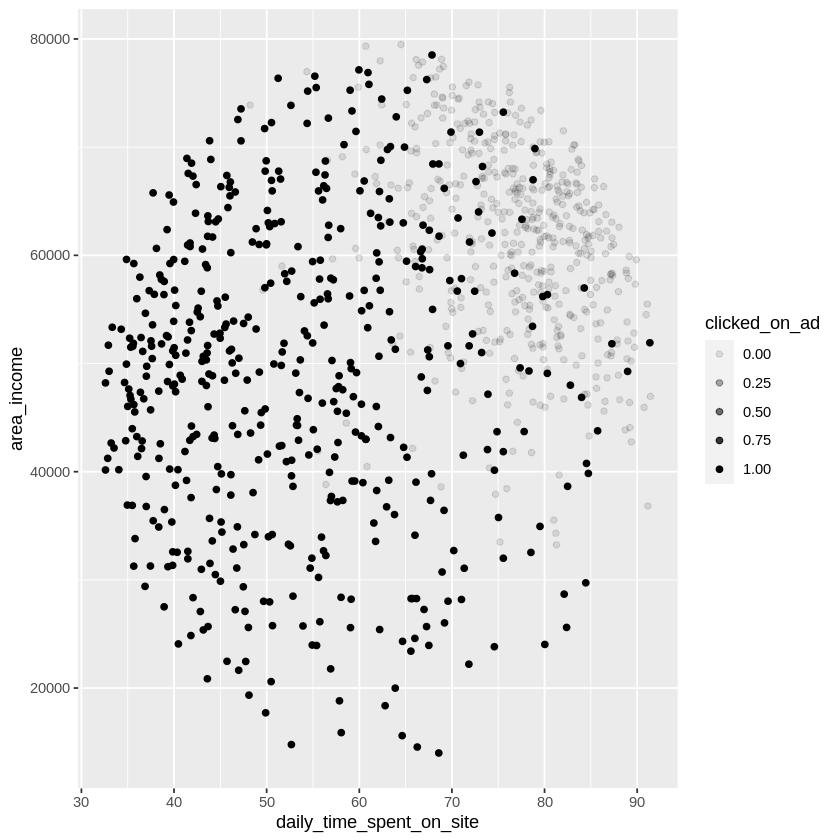

In [77]:
# scatter plot between daily amount spent on the site vs the area income 
ggplot(data = data) + 
  geom_point(mapping = aes(x = daily_time_spent_on_site, y = area_income, alpha = clicked_on_ad))

From the scatter plot above we can deduce that most of the individuals that spent alot of time on the site and are from high areas of income did not click on the ad. While those who spent less time on the site did click on the ad regardless of the area of income but the lesser the time spent the more clicks on the ad were. 

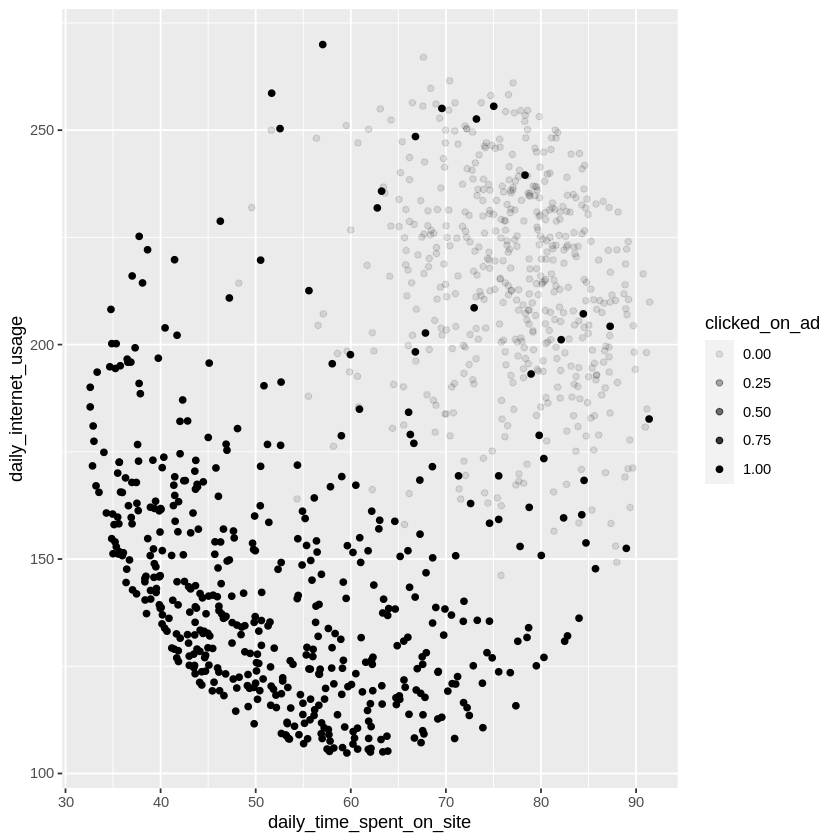

In [78]:
# scatter plot between daily time spent on site and daily internet usage
ggplot(data = data) + 
  geom_point(mapping = aes(x = daily_time_spent_on_site, y = daily_internet_usage , alpha = clicked_on_ad))

Majority of the people who have low to medium internet usage and low to medium time spent on site clicked on the ad compared to the high internet usage and time spent individuals.

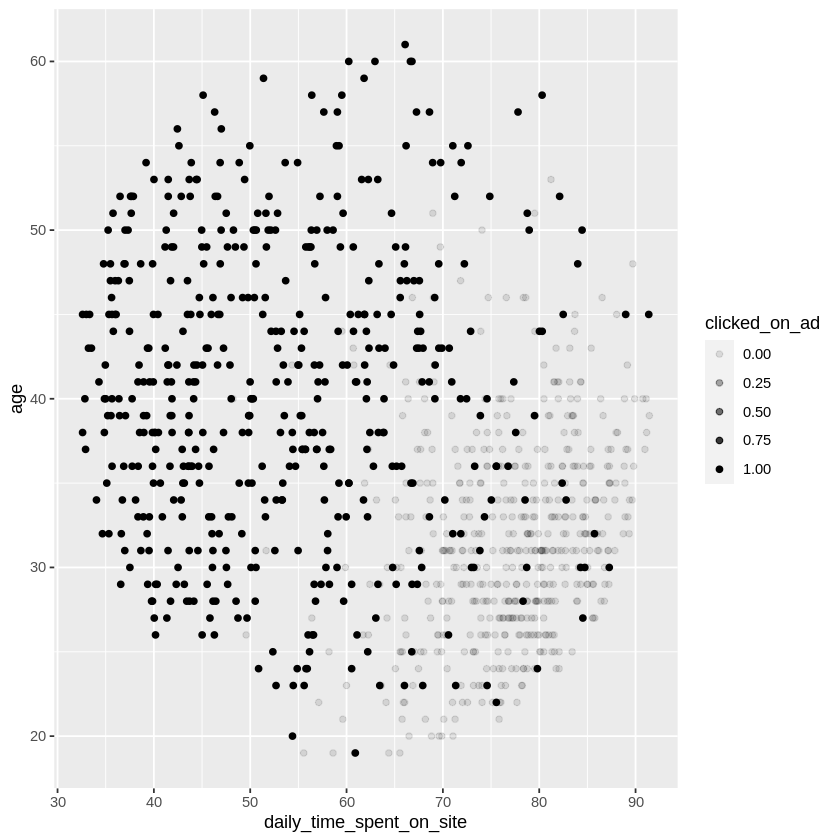

In [79]:
# scatter plot between daily time spent on site and age
ggplot(data = data) + 
  geom_point(mapping = aes(x = daily_time_spent_on_site , y = age , alpha = clicked_on_ad))

Most young people below the age of 40 that spend alot of time on the site did not click on the ad while those that spent less time on the site clicked on the ad.

##### Scatter plot between Age, area income and daily internet usage.

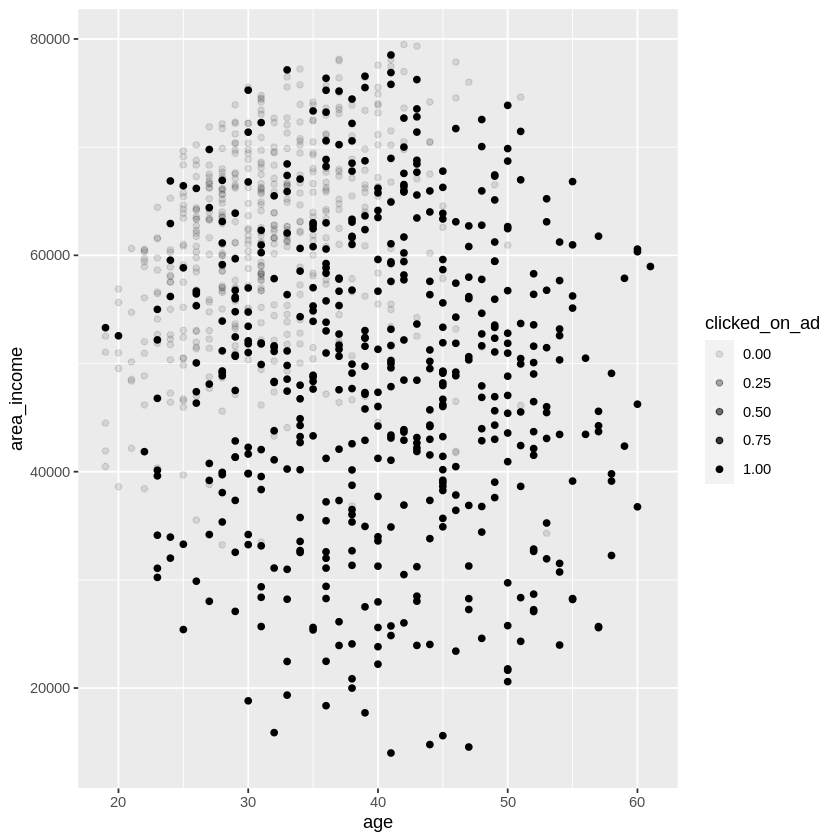

In [80]:
# scatter plot between age and area income 
ggplot(data = data) + 
  geom_point(mapping = aes(x = age , y = area_income, alpha = clicked_on_ad))

Most people that are from higher areas of income and are below the age of 40 did not click on the ad. While the older generation clicked on the ad regardless of the area of income.

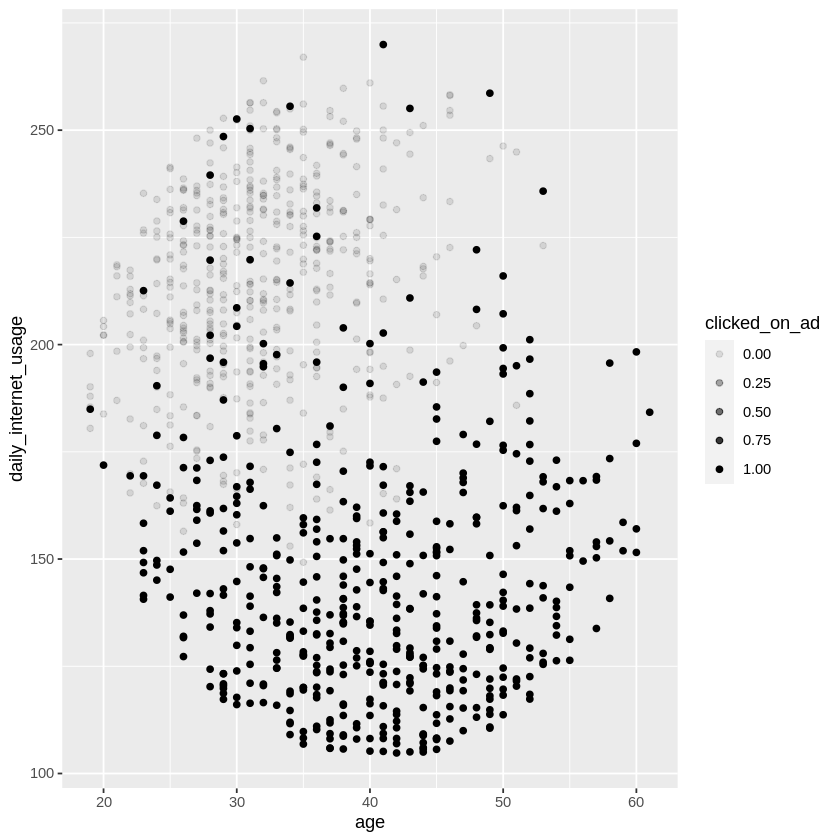

In [81]:
# scatter plot between age and daily internet usage
ggplot(data = data) + 
  geom_point(mapping = aes(x = age , y = daily_internet_usage , alpha = clicked_on_ad))

Most individuals aged 40 and below and have high daily internet usage did not click on the ad. While those from lower internet usage did click the ad.

##### Scatter plot for area income and daily internet usage

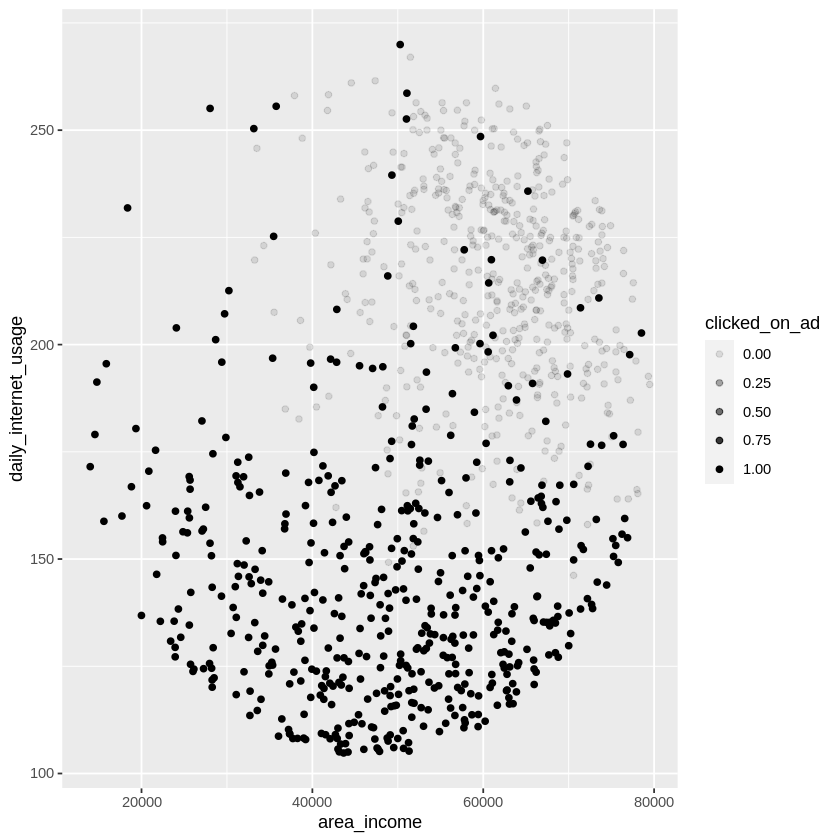

In [82]:
# scatter plot between 
ggplot(data = data) + 
  geom_point(mapping = aes(x = area_income, y = daily_internet_usage, alpha = clicked_on_ad))

Those with high daily internet usage and from higher areas of income did not click on the ad. While those from low to medium internet usage had more visitors click the ad.

## 5. Conclusion

We have identified that those likely to click on the ad are:
1. Peope who spend less time on the site, infact statistics show that the lesser the time spent the more clicks there are.
2. Those with low to medium internet usage as well as low to medium time spent on site.
3. Those aged above 30 and did not spend alot of time on the site.
4. Those aged above 40 regardless of area of income clicked on the ad.
5. Those with lower internet usage clicked on the ad regardless of age.
6. When we compare the daily internet usage and area of income we find that those of lower internet usage clicked on the ad regardless of area of income.

## 6. Recommendation

We recommed that our client does the following:
1. Create ads that are targeted to the younger population as well.
2. Target those aged between 30 and above to avoid losing them. 
3. Have short ads as most visitors that clicked on the ad have lower internet usage.
4. Target the most common countries like Tunisia.
5. Target cities like Wrightburgh as well.
6. Use the ad topic line 5th generation orchestartion as it seems to be popular or create an ad topic line similar to it.
7. Employ an algorithm a classification or regression one to help answer the research question and add more weight to the above conclusions.

## 7. Follow up questions

1. Did we have the right data? **Yes we did**

2. Did we have the right question? **Yes we did**

3. Do we need to do anything else to answer the question? **Yes we would need to have a regression or classification algorithm that helps us identify patterns and characteristics of those that click on the ad to better identify individuals who click on the ad.**